In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

## Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The Bank Marketing dataset can be found at:  https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
dfBankData = pd.read_csv('../data/bank-additional-full.csv', sep = ';')

In [3]:
dfBankData.shape

(41188, 21)

### Perform Exploratory Data Analysis

In [4]:
dfBankData.isnull().values.any()

False

In [5]:
# Inspect the data types
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
dfBankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dfBankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
dfBankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
dfBankData.duplicated().sum()

12

In [10]:
# There are 12 duplicated rows.  Identify them
dfBankData[dfBankData.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
dfBankData.drop_duplicates(inplace = True)     # drop duplicate rows

In [12]:
dfBankData.shape

(41176, 21)

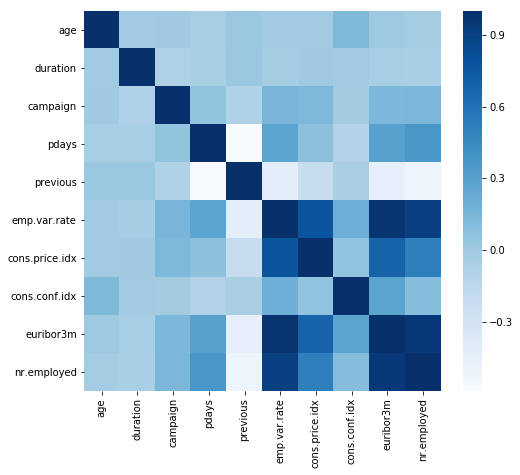

In [13]:
# Calculate the correlations between numeric features
correlations = dfBankData.corr()
plt.figure(figsize=(8, 7))
#Plot heatmap of correlations
sns.heatmap(correlations, cmap="Blues")
plt.show()

# The economic indicators strongly correlate with each other, while the 'previous' and 'pdays' features have a strong 
# negative correlation, since the largest value of 'pdays' (999) corresponds to the smallest value of 'previous' (0)

In [14]:
y_mapping = {'yes': 1, 'no': 0}
dfBankData['y'] = dfBankData['y'].map(y_mapping)
dfBankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
dfBankData.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [16]:
# Remove rows containing unknown job values
# could also reassign 'unknown' values to the most frequent job class, which, after executing this cell will be blue-collar
dfBankData = dfBankData[dfBankData.job != 'unknown']

# https://en.wikipedia.org/wiki/Multicollinearity
# To reduce the collinearity problem - where one predictor variable can be linearly predicted from the others - simplify and 
# reduce the job categories (i.e., combine sparse or similar classes into a single category to simplify the prediction model
# and decrease the computational complexity of the model)

# Combine entrepreneurs and self-employed into self-employed
dfBankData.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace = True)

# Combine blue-collar and tecnician jobs into blue-collar
dfBankData.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace = True)

# Combining services and housemaid into services
dfBankData.job.replace(['services', 'housemaid'], 'services', inplace = True)

dfBankData.job.value_counts()

blue-collar      15992
admin.           10419
services          5027
management        2924
self-employed     2877
retired           1718
unemployed        1014
student            875
Name: job, dtype: int64

In [17]:
jobdf = dfBankData.groupby('job').agg({'y':'sum'}).sort_values('y').reset_index()
jobdf

,job,y
0,unemployed,144
1,self-employed,273
2,student,275
3,management,328
4,services,429
5,retired,434
6,admin.,1351
7,blue-collar,1368


In [18]:
mapping = {'blue-collar': 7, 'admin.': 6, 'retired': 5, 'services': 4, 'management': 3, 'student': 2, 
           'self-employed': 1, 'unemployed': 0}
dfBankData['job'] = dfBankData['job'].map(mapping)

In [19]:
dfBankData.marital.value_counts()

married     24687
single      11490
divorced     4598
unknown        71
Name: marital, dtype: int64

In [20]:
# Remove rows containing unknown marital values
dfBankData = dfBankData[dfBankData.marital != 'unknown']

# Combining single and divorced into single
dfBankData.marital.replace(['single', 'divorced'], 'single', inplace = True)
dfBankData.marital.value_counts()

married    24687
single     16088
Name: marital, dtype: int64

In [21]:
newdf = dfBankData.groupby('marital').agg({'y':'sum'}).sort_values('y').reset_index()
newdf

,marital,y
0,single,2078
1,married,2515


In [22]:
# one-hot encoding for 'marital' values
dfBankData = pd.get_dummies(dfBankData, columns = ['marital'])
dfBankData.head(20)

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single
0,56,4,basic.4y,no,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,4,high.school,unknown,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,4,high.school,no,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,6,basic.6y,no,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,4,high.school,no,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
5,45,4,basic.9y,unknown,no,no,telephone,may,mon,198,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
6,59,6,professional.course,no,no,no,telephone,may,mon,139,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
7,41,7,unknown,unknown,no,no,telephone,may,mon,217,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
8,24,7,professional.course,no,yes,no,telephone,may,mon,380,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1
9,25,4,high.school,no,yes,no,telephone,may,mon,50,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1


In [23]:
dfBankData.education.value_counts()

university.degree      12092
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
unknown                 1595
illiterate                18
Name: education, dtype: int64

In [24]:
# Combine basic school degrees
dfBankData.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic', inplace = True)
dfBankData.education.value_counts()

# Remove rows containing unknown or illiterate education values
dfBankData = dfBankData[(dfBankData.education != 'unknown') & (dfBankData.education != 'illiterate')]
dfBankData.education.value_counts()

basic                  12387
university.degree      12092
high.school             9461
professional.course     5222
Name: education, dtype: int64

In [25]:
newdf = dfBankData.groupby('education').agg({'y':'sum'}).sort_values('y').reset_index()
newdf

,education,y
0,professional.course,594
1,high.school,1028
2,basic,1080
3,university.degree,1653


In [26]:
mapping = {'university.degree': 3, 'basic': 2, 'high.school': 1, 'professional.course': 0}
dfBankData['education'] = dfBankData['education'].map(mapping)

In [27]:
# Has this person defaulted on a credit in default?  
dfBankData.default.value_counts()

# Since the number of yes responses is only 3, this does not appear to be useful for predicting the correct outcome, 
# so 'default' will be dropped

no         31203
unknown     7956
yes            3
Name: default, dtype: int64

In [28]:
# Does this person have a housing loan? (categorical: 'no','yes','unknown')
dfBankData.housing.value_counts()

yes        20563
no         17653
unknown      946
Name: housing, dtype: int64

In [29]:
# Remove rows containing unknown housing values
dfBankData = dfBankData[dfBankData.housing != 'unknown']
dfBankData.housing.value_counts()

yes    20563
no     17653
Name: housing, dtype: int64

In [30]:
# Does this person have a personal loan? (categorical: 'no','yes','unknown')
dfBankData.loan.value_counts()

no     32260
yes     5956
Name: loan, dtype: int64

In [31]:
# contact communication type (categorical: 'cellular','telephone') 
dfBankData.contact.value_counts()

# The contact method shouldn't affect anything, so 'contact' will be dropped

cellular     24417
telephone    13799
Name: contact, dtype: int64

In [32]:
# last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
dfBankData.month.value_counts()

may    12789
jul     6621
aug     5815
jun     4846
nov     3894
apr     2433
oct      658
sep      502
mar      497
dec      161
Name: month, dtype: int64

In [33]:
newdf = dfBankData.groupby('month').agg({'y':'sum'}).sort_values('y').reset_index()
newdf

,month,y
0,dec,77
1,sep,225
2,mar,252
3,oct,297
4,nov,384
5,apr,485
6,jun,511
7,aug,594
8,jul,598
9,may,830


In [34]:
mapping = {'may': 9, 'jul': 8, 'aug': 7, 'jun': 6, 'nov': 5, 'apr': 4, 'oct': 3, 'sep': 2, 'mar': 1, 'dec': 0}
dfBankData['month'] = dfBankData['month'].map(mapping)

In [35]:
# last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
dfBankData.day_of_week.value_counts()

thu    8001
mon    7924
wed    7600
tue    7472
fri    7219
Name: day_of_week, dtype: int64

In [36]:
newdf = dfBankData.groupby('day_of_week').agg({'y':'sum'}).sort_values('y').reset_index()
newdf

# The number of yeses is evenly spread out with respect to the day of the week, so it does not appear to be statistically
# significant, and will be dropped 

,day_of_week,y
0,fri,771
1,mon,786
2,tue,863
3,wed,874
4,thu,959


In [37]:
# number of contacts performed during this campaign and for this client (numeric, includes last contact)
dfBankData.campaign.value_counts()

1     16360
2      9813
3      4951
4      2460
5      1502
6       911
7       583
8       372
9       258
10      207
11      166
12      115
13       76
14       64
17       54
15       47
16       45
18       31
20       30
19       23
21       19
22       17
23       16
24       15
27       11
29        9
28        8
31        7
26        7
25        7
30        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
Name: campaign, dtype: int64

In [38]:
# number of days that passed by after the client was last contacted from a previous campaign (numeric)
# 999 means client was not previously contacted
dfBankData.pdays.value_counts()

999    36851
3        393
6        378
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
19         3
22         3
21         2
26         1
25         1
27         1
Name: pdays, dtype: int64

In [39]:
# number of contacts performed before this campaign and for this client (numeric)
# 0 means client was not previously contacted
dfBankData.previous.value_counts()

0    33039
1     4232
2      672
3      195
4       57
5       16
6        4
7        1
Name: previous, dtype: int64

In [40]:
# outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# 'nonexistent' means client was not previously contacted
dfBankData.poutcome.value_counts()

nonexistent    33039
failure         3935
success         1242
Name: poutcome, dtype: int64

In [41]:
# pdays, previous, and poutcome indicate whether a person is a new or existing customer.  
# For a new customer:
# • pdays (number of days that passed by after the client was last contacted from a previous campaign) = '999'
# • previous (number of contacts performed before this campaign for this client) = 0
# • poutcome (outcome of the previous marketing campaign) = 'nonexistent'
# From the value counts, above, the number of previous|0 entries == the number of poutcome|nonexistent entries, but they 
# do not equal the number of pdays|999 entries 
zeroPrevious = dfBankData.previous.value_counts()
poutcomes = dfBankData.poutcome.value_counts()
pdays = dfBankData.pdays.value_counts()
print('Previous == 0          :', zeroPrevious[0])
print('poutcome == nonexistent:', poutcomes['nonexistent'])
print('pdays    == 999        :', pdays[999])

Previous == 0          : 33039
poutcome == nonexistent: 33039
pdays    == 999        : 36851


In [42]:
pdays[999] - poutcomes['nonexistent']

3812

In [43]:
# What is poutcome set to (if it is not 'nonexistent') when pdays is set to 999?
newdf = dfBankData[(dfBankData.pdays == 999) & (dfBankData.poutcome != 'nonexistent')]
newdf.poutcome.value_counts()

failure    3812
Name: poutcome, dtype: int64

In [44]:
newdf.previous.value_counts()

# So, when 'poutcome' == 'failure', it means the bank attempted to contact the client in the previous campaign, but failed.
# For these 3,812 people, 'pdays' == 999, meaning the client was not previously contacted.  However, 'previous' is NOT set 
# to 0 for these people (see below). Clearly, 'pdays' is not defined correctly there is no way to impute those values.  As 
# a result, these values are undefined and will be deleted, so as not to confuse our prediction model

1    3439
2     316
3      44
4      10
5       2
6       1
Name: previous, dtype: int64

In [45]:
dfBankData.shape

(38216, 22)

In [46]:
# Remove rows containing pdays == 999 and poutcome != 'nonexistent'
dfBankData = dfBankData[~((dfBankData.pdays == 999) & (dfBankData.poutcome != 'nonexistent'))]
dfBankData.shape

(34404, 22)

In [47]:
newdf = dfBankData.groupby('poutcome').agg({'y':'sum'}).sort_values('y').reset_index()
newdf

,poutcome,y
0,failure,62
1,success,802
2,nonexistent,2918


In [48]:
mapping = {'nonexistent': 2, 'success': 1, 'failure': 0}
dfBankData['poutcome'] = dfBankData['poutcome'].map(mapping)

In [49]:
# duration:  this attribute highly affects the output target (e.g., if duration=0 then y='no').  Yet, the duration is not 
# known before a call is performed.  Also, after the end of the call y is obviously known.  Thus, this input should only be 
# included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
dfBankData.drop(['contact', 'day_of_week', 'default', 'duration'], axis = 1, inplace = True)

In [50]:
dfBankData.dtypes

age                  int64
job                  int64
education            int64
housing             object
loan                object
month                int64
campaign             int64
pdays                int64
previous             int64
poutcome             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
marital_married      uint8
marital_single       uint8
dtype: object

In [51]:
# Original way we converted categorical data to numerical data
'''
def convertCategoricalData(column):
    mapping = {label:idx for idx, label in enumerate(np.unique(dfBankData[column]))}
    dfBankData[column] = dfBankData[column].map(mapping)
    print(column)
    
# Select the categorical columns
# categoricalCols = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'y' ]
categoricalCols = ['education', 'housing', 'loan', 'poutcome']
for col in categoricalCols:
    convertCategoricalData(col)
    
dfBankData.head(20)
'''

"\ndef convertCategoricalData(column):\n    mapping = {label:idx for idx, label in enumerate(np.unique(dfBankData[column]))}\n    dfBankData[column] = dfBankData[column].map(mapping)\n    print(column)\n    \n# Select the categorical columns\n# categoricalCols = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome', 'y' ]\ncategoricalCols = ['education', 'housing', 'loan', 'poutcome']\nfor col in categoricalCols:\n    convertCategoricalData(col)\n    \ndfBankData.head(20)\n"

In [52]:
# Since we do not want to manually alter each object/categorical column, we use a function to change all the 'object' 
# columns to numerical to prep our data for ML methodologies
object_cols = dfBankData.dtypes.pipe(lambda x: x[x == 'object']).index

for col in object_cols:
    dfBankData[col] = pd.factorize(dfBankData[col])[0]
    
dfBankData.head(10)

,age,job,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single
0,56,4,2,0,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,4,1,0,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,4,1,1,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,6,2,0,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,4,1,0,1,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
5,45,4,2,0,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
6,59,6,0,0,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0
8,24,7,0,1,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,1
9,25,4,1,1,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,1
11,25,4,1,1,0,9,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0,0,1


### Compute NULL Accuracy

In [53]:
dfBankData.y.value_counts()

0    30622
1     3782
Name: y, dtype: int64

In [54]:
dfBankData.y.value_counts()/dfBankData.y.count()

0    0.890071
1    0.109929
Name: y, dtype: float64

In [55]:
dfBankData.shape

(34404, 18)

In [56]:
# Perform the NULL accuracy test on the entire DataFrame
print('DataFrame:', dfBankData.y.value_counts()[0], '/', dfBankData.y.count(), '=', dfBankData.y.value_counts()[0] / dfBankData.y.count())

# Only 3,782 people (11%) subscribed for a deposit during the current campaign, while 30,622 (89%) did not.  This is an 
# imbalanced data set, meaning a model built on it can be correct 89% of the time if it simply predicts 'no' as a result 
# and ignores the positive responses

DataFrame: 30622 / 34404 = 0.8900709219858156


### Begin Evaluating ML Models

In [117]:
from sklearn.model_selection import train_test_split

feature_cols = ['age', 'job', 'education', 'housing', 'loan', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'marital_married', 
                'marital_single']

# split X and y training and test data
X_train, X_test, y_train, y_test = train_test_split(dfBankData[feature_cols], dfBankData['y'], random_state = 1)

In [118]:
# Perform the NULL accuracy test on the y_test variable
print('y_test:', y_test.value_counts()[0], '/', y_test.count(), '=', y_test.value_counts()[0] / y_test.count())

y_test: 7680 / 8601 = 0.8929194279734914


In [119]:
print ('X_train:  ', X_train.shape)
print('-' * 70)
print ('y_train:  ', y_train.shape)
print('-' * 70)
print ('X_test:   ', X_test.shape)
print('-' * 70)  
print ('y_test:   ', y_test.shape)
print('-' * 70) 

X_train:   (25803, 17)
----------------------------------------------------------------------
y_train:   (25803,)
----------------------------------------------------------------------
X_test:    (8601, 17)
----------------------------------------------------------------------
y_test:    (8601,)
----------------------------------------------------------------------


In [120]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def executeModel(model, printConfusionMatrix = False):
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # measure
    metrics.r2_score(y_test, y_pred)
    
    if (printConfusionMatrix):
        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
        print('-' * 70) 
        print(confusion_matrix, '\n')
    
    return(metrics.accuracy_score(y_test, y_pred))

In [121]:
from sklearn.neighbors import KNeighborsClassifier

maxNeighborRange = range(3, 18)
accuracyScores = []    # list to store the accuracy score for each value of max_depth

for numNeighbors in maxNeighborRange:
    accuracy = executeModel(KNeighborsClassifier(n_neighbors = numNeighbors))
    accuracyScores.append(accuracy)
    print('Accuracy for neighbors =', numNeighbors, ':', accuracy)

Accuracy for neighbors = 3 : 0.8865248226950354
Accuracy for neighbors = 4 : 0.8998953610045344
Accuracy for neighbors = 5 : 0.8976863155447041
Accuracy for neighbors = 6 : 0.9016393442622951
Accuracy for neighbors = 7 : 0.899779095454017
Accuracy for neighbors = 8 : 0.9032670619695384
Accuracy for neighbors = 9 : 0.9019881409138473
Accuracy for neighbors = 10 : 0.9029182653179862
Accuracy for neighbors = 11 : 0.9015230787117777
Accuracy for neighbors = 12 : 0.9034995930705731
Accuracy for neighbors = 13 : 0.9029182653179862
Accuracy for neighbors = 14 : 0.9051273107778165
Accuracy for neighbors = 15 : 0.9044297174747122
Accuracy for neighbors = 16 : 0.9048947796767818
Accuracy for neighbors = 17 : 0.90408092082316


Text(0, 0.5, 'Accuracy (higher is better)')

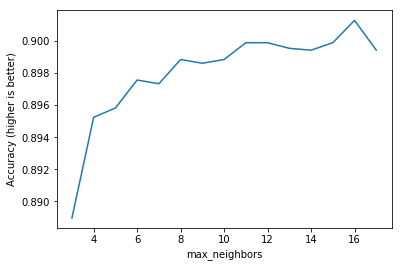

In [107]:
# plot maxNeighborRange (x-axis) versus accuracyScores (y-axis)
plt.plot(maxNeighborRange, accuracyScores)
plt.xlabel('max_neighbors')
plt.ylabel('Accuracy (higher is better)')

In [108]:
maxNeighborRange = range(47, 53)
accuracyScores = []

for numNeighbors in maxNeighborRange:
    accuracy = executeModel(KNeighborsClassifier(n_neighbors = numNeighbors))
    accuracyScores.append(accuracy)
    print('Accuracy for neighbors =', numNeighbors, ':', accuracy)

Accuracy for neighbors = 47 : 0.9018718753633298
Accuracy for neighbors = 48 : 0.9023369375653993
Accuracy for neighbors = 49 : 0.9018718753633298
Accuracy for neighbors = 50 : 0.902220672014882
Accuracy for neighbors = 51 : 0.9019881409138473
Accuracy for neighbors = 52 : 0.9021044064643646


Text(0, 0.5, 'Accuracy (higher is better)')

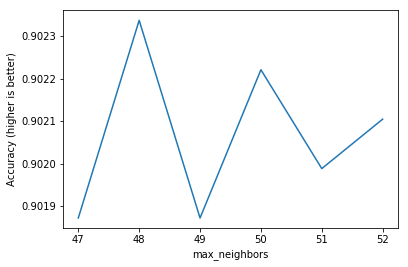

In [109]:
# plot maxNeighborRange (x-axis) versus accuracyScores (y-axis)
plt.plot(maxNeighborRange, accuracyScores)
plt.xlabel('max_neighbors')
plt.ylabel('Accuracy (higher is better)')

In [110]:
from sklearn.tree import DecisionTreeClassifier

maxDepthRange = range(3, 10)
accuracyScores = []    # list to store the accuracy score for each value of max_depth

for depth in maxDepthRange:
    accuracy = executeModel(DecisionTreeClassifier(max_depth = depth, min_samples_split = 2, random_state = 0))
    accuracyScores.append(accuracy)
    print('Accuracy for depth =', depth, ':', accuracy)

Accuracy for depth = 3 : 0.9066387629345425
Accuracy for depth = 4 : 0.9054761074293687
Accuracy for depth = 5 : 0.9058249040809209
Accuracy for depth = 6 : 0.9059411696314382
Accuracy for depth = 7 : 0.900709219858156
Accuracy for depth = 8 : 0.9008254854086735
Accuracy for depth = 9 : 0.8985001743983257


Text(0, 0.5, 'Accuracy (higher is better)')

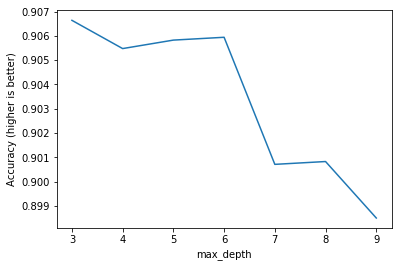

In [111]:
# plot maxDepthRange (x-axis) versus accuracyScores (y-axis)
plt.plot(maxDepthRange, accuracyScores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (higher is better)')

In [112]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
treeclf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2, random_state = 0)
accuracy = executeModel(treeclf)
accuracyScores.append(accuracy)
print('Accuracy for depth = 6:', accuracy)
newdf = pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})
newdf.sort_values('importance', ascending = False)

Accuracy for depth = 6: 0.9059411696314382


,feature,importance
2,euribor3m,0.664944
1,pdays,0.108816
3,emp.var.rate,0.103480
4,month,0.082396
0,age,0.030405
6,job,0.006124
5,education,0.003835


In [113]:
from sklearn.ensemble import RandomForestClassifier

# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
rfclf = RandomForestClassifier(n_jobs = -1, max_depth = 6, n_estimators = 9, max_features = 1)
accuracy = executeModel(rfclf)
accuracyScores.append(accuracy)
print('Accuracy for depth = 6:', accuracy)
newdf = pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})
newdf.sort_values('importance', ascending = False)

Accuracy for depth = 6: 0.9058249040809209


,feature,importance
2,euribor3m,0.311271
1,pdays,0.229021
3,emp.var.rate,0.193865
4,month,0.166071
0,age,0.069314
6,job,0.017357
5,education,0.013100


In [114]:
from sklearn.ensemble import RandomForestClassifier

maxEstimatorRange = range(3, 16)
accuracyScores = []    # list to store the accuracy score for each value of max_depth

for est in maxEstimatorRange:
    accuracy = executeModel(RandomForestClassifier(n_jobs = -1, max_depth = 6, n_estimators = est, max_features = 1))
    accuracyScores.append(accuracy)
    print('Accuracy for estimators =', est, ':', accuracy)

Accuracy for estimators = 3 : 0.9062899662829903
Accuracy for estimators = 4 : 0.9024532031159167
Accuracy for estimators = 5 : 0.9034995930705731
Accuracy for estimators = 6 : 0.9004766887571213
Accuracy for estimators = 7 : 0.9029182653179862
Accuracy for estimators = 8 : 0.907103825136612
Accuracy for estimators = 9 : 0.9054761074293687
Accuracy for estimators = 10 : 0.9073363562376467
Accuracy for estimators = 11 : 0.9060574351819556
Accuracy for estimators = 12 : 0.9058249040809209
Accuracy for estimators = 13 : 0.9057086385304034
Accuracy for estimators = 14 : 0.905592372979886
Accuracy for estimators = 15 : 0.9057086385304034


Text(0, 0.5, 'Accuracy (higher is better)')

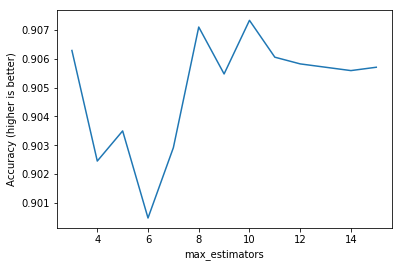

In [115]:
# plot maxEstimatorRange (x-axis) versus accuracyScores (y-axis)
plt.plot(maxEstimatorRange, accuracyScores)
plt.xlabel('max_estimators')
plt.ylabel('Accuracy (higher is better)')

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

names = ["Logistic Regression", "Nearest Neighbors", "Decision Tree", "Random Forest", "AdaBoost 50", "Sigmoid SVM", 
         "AdaBoost 10", "GradientBoost"]

classifiers = [ 
    LogisticRegression(solver = 'lbfgs', max_iter = 100, C = 1e9),
    KNeighborsClassifier(n_neighbors = 14),
    DecisionTreeClassifier(max_depth = 6, min_samples_split = 2, random_state = 0),
    RandomForestClassifier(n_jobs = -1, max_depth = 6, n_estimators = 11, max_features = 1),
    AdaBoostClassifier(),
    SVC(kernel = "sigmoid", gamma = 'auto', C = 0.025),
    AdaBoostClassifier(n_estimators = 10),
    GradientBoostingClassifier(n_estimators = 10, learning_rate = 1.0, max_depth = 1, random_state = 0)]

# Evalute the classifiers
# zip merges the two lists together, treating the two lists as key and data to create a dictionary
for modelName, clf in zip(names, classifiers):
    print('Accuracy for', modelName, '=', executeModel(clf, True))
    
# Accuracy for  Logistic Regression = 0.9062899662829903
# Accuracy for  Nearest Neighbors = 0.905243576328334
# Accuracy for  Decision Tree = 0.9084990117428206
# Accuracy for  Random Forest = 0.9062899662829903
# Accuracy for  AdaBoost = 0.9065224973840251
# Accuracy for  Sigmoid SVM = 0.8929194279734914
# Accuracy for  AdaBoost = 0.9054761074293687
# Accuracy for  GradientBoost = 0.9065224973840251

C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


----------------------------------------------------------------------
Predicted     0    1   All
Actual                    
0          7602   78  7680
1           752  169   921
All        8354  247  8601 

Accuracy for Logistic Regression = 0.9034995930705731
----------------------------------------------------------------------
Predicted     0    1   All
Actual                    
0          7555  125  7680
1           740  181   921
All        8295  306  8601 

Accuracy for Nearest Neighbors = 0.8994302988024648
----------------------------------------------------------------------
Predicted     0    1   All
Actual                    
0          7573  107  7680
1           702  219   921
All        8275  326  8601 

Accuracy for Decision Tree = 0.9059411696314382
----------------------------------------------------------------------
Predicted     0    1   All
Actual                    
0          7596   84  7680
1           721  200   921
All        8317  284  8601 

Accuracy for R

### Try Scaling the Data

In [72]:
from sklearn.preprocessing import MinMaxScaler

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
# The MinMaxScaler instance must be fitted before scaling
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (25803, 17)
per-feature minimum before scaling:
 age                  17.000
job                   0.000
education             0.000
housing               0.000
loan                  0.000
month                 0.000
campaign              1.000
pdays                 0.000
previous              0.000
poutcome              0.000
emp.var.rate         -3.400
cons.price.idx       92.201
cons.conf.idx       -50.800
euribor3m             0.634
nr.employed        4963.600
marital_married       0.000
marital_single        0.000
dtype: float64
per-feature maximum before scaling:
 age                  98.000
job                   7.000
education             3.000
housing               1.000
loan                  1.000
month                 9.000
campaign             43.000
pdays               999.000
previous              6.000
poutcome              2.000
emp.var.rate          1.400
cons.price.idx       94.767
cons.conf.idx       -26.900
euribor3m             5.045
nr.employed 

C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [73]:
def executeModelScaled(model):
    # train
    model.fit(X_train_scaled, y_train)
    # predict
    y_pred = model.predict(X_test_scaled)
    # measure
    metrics.r2_score(y_test, y_pred)
    return(metrics.accuracy_score(y_test, y_pred))

# Evalute the classifiers
# zip merges the two lists together, treating the two lists as key and data to create a dictionary
for modelName, clf in zip(names, classifiers):
    print('Accuracy for', modelName, '=', executeModelScaled(clf))

#                         Before Scaling         After Scaling
# Logistic Regression     0.9062899662829903     0.9067550284850598
# Nearest Neighbors       0.905243576328334      0.9043134519241949
# Decision Tree           0.9084990117428206     0.9084990117428206
# Random Forest           0.9062899662829903     0.9064062318335078
# AdaBoost 50             0.9065224973840251     0.9065224973840251
# Sigmoid SVM             0.8929194279734914     0.8929194279734914
# AdaBoost 10             0.9054761074293687     0.9054761074293687
# GradientBoost           0.9065224973840251     0.9065224973840251

C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy for Logistic Regression = 0.9061737007324729
Accuracy for Nearest Neighbors = 0.9026857342169515
Accuracy for Decision Tree = 0.9050110452272991
Accuracy for Random Forest = 0.9058249040809209
Accuracy for AdaBoost 50 = 0.9065224973840251
Accuracy for Sigmoid SVM = 0.8929194279734914
Accuracy for AdaBoost 10 = 0.9054761074293687
Accuracy for GradientBoost = 0.9065224973840251


### Cross-validation on Unscaled Data

In [74]:
from sklearn.model_selection import cross_val_score

X = dfBankData[feature_cols]
y = dfBankData['y']

# Employ the KNeighborsClassifier, and search for an optimal value of k (n_neighbors)
k_range = range(5, 16)  # 11 * 5 iterations
k_scores_mean = []
k_score_items = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # cross_val_score() performs the instantiate, fit, predict, and score all in one function, where 
    # cv == number of folds, 'accuracy' is the scoring metric    
    scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
    k_score_items.append(scores)
    k_scores_mean.append(scores.mean())

for k, mean in zip(k_range, k_scores_mean):
    print('For neighbors =', k, 'average accuracy =', mean)

For neighbors = 5 accuracy = 0.5818067523637666
For neighbors = 6 accuracy = 0.6079369082135399
For neighbors = 7 accuracy = 0.5980834566749796
For neighbors = 8 accuracy = 0.6154064360684766
For neighbors = 9 accuracy = 0.6091281435223671
For neighbors = 10 accuracy = 0.6209865726566777
For neighbors = 11 accuracy = 0.6159290244858511
For neighbors = 12 accuracy = 0.6269733734109203
For neighbors = 13 accuracy = 0.6230786243858263
For neighbors = 14 accuracy = 0.6328731338239966
For neighbors = 15 accuracy = 0.6296469556578335


Text(0, 0.5, 'Cross-Validated Accuracy')

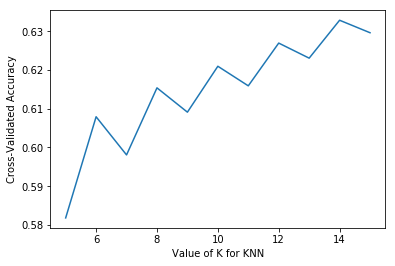

In [75]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores_mean)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [76]:
# Employ the KNeighborsClassifier, and search for an optimal value of k (n_neighbors)
k_range = range(47, 53)  # 6 * 5 iterations
k_scores_mean = []
k_score_items = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # cross_val_score() performs the instantiate, fit, predict, and score all in one function, where 
    # cv == number of folds, 'accuracy' is the scoring metric    
    scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
    k_score_items.append(scores)
    k_scores_mean.append(scores.mean())

for k, mean in zip(k_range, k_scores_mean):
    print('For neighbors =', k, 'average accuracy =', mean)

For neighbors = 47 accuracy = 0.6728040540540541
For neighbors = 48 accuracy = 0.6743445236309078
For neighbors = 49 accuracy = 0.6737631789704183
For neighbors = 50 accuracy = 0.6755071200232492
For neighbors = 51 accuracy = 0.6748966971472599
For neighbors = 52 accuracy = 0.6755652004217271


Text(0, 0.5, 'Cross-Validated Accuracy')

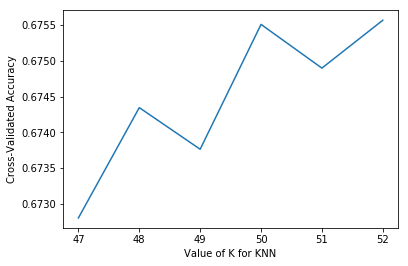

In [77]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores_mean)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Perform Cross-validation with all of the ML Models

In [78]:
from sklearn.model_selection import KFold

k_score_items = []

# Evalute the classifiers using cross-validation
# zip merges the two lists together, treating the two lists as key and data to create a dictionary
for modelName, clf in zip(names, classifiers):
    kfold = KFold(n_splits = 5, random_state = 5)
    scores = cross_val_score(clf, X, y, cv = kfold, scoring = 'accuracy')
    k_score_items.append(scores)
    msg = 'Average accuracy for %s = %f' % (modelName, scores.mean())
    print(msg)

C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: l

Average accuracy for Logistic Regression = 0.891316
Average accuracy for Nearest Neighbors = 0.894368
Average accuracy for Decision Tree = 0.890153
Average accuracy for Random Forest = 0.891955
Average accuracy for AdaBoost 50 = 0.890589
Average accuracy for Sigmoid SVM = 0.890066
Average accuracy for AdaBoost 10 = 0.890851
Average accuracy for GradientBoost = 0.891490


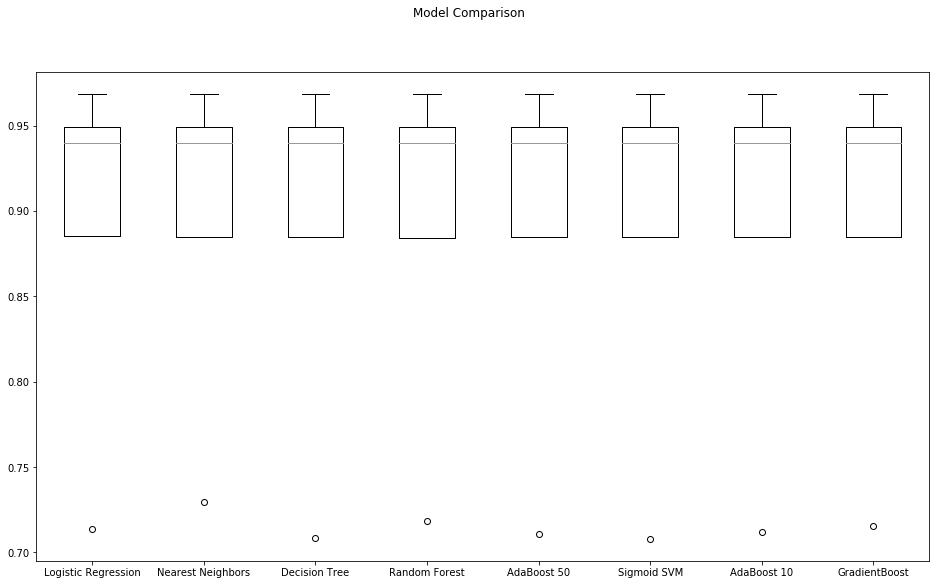

In [79]:
# Compare the algorithms' cross-validation using boxplots
fig = plt.figure(figsize = (16, 9))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(k_score_items)
ax.set_xticklabels(names)
plt.show()

In [80]:
for modelName, k_scores in zip(names, k_score_items):
    print(modelName, ':', k_scores)

Logistic Regression : [0.96860921 0.94898997 0.93983433 0.88548176 0.71366279]
Nearest Neighbors : [0.96860921 0.94898997 0.93983433 0.88475512 0.72965116]
Decision Tree : [0.96860921 0.94898997 0.93983433 0.8846098  0.70872093]
Random Forest : [0.96860921 0.94898997 0.93983433 0.88417381 0.7181686 ]
AdaBoost 50 : [0.96860921 0.94898997 0.93983433 0.88475512 0.71075581]
Sigmoid SVM : [0.96860921 0.94898997 0.93983433 0.88475512 0.70813953]
AdaBoost 10 : [0.96860921 0.94898997 0.93983433 0.88475512 0.71206395]
GradientBoost : [0.96860921 0.94898997 0.93983433 0.88475512 0.71526163]


### Run Cross-Validation using Scaled Data

In [81]:
# Run Cross-Validation using scaled data
k_score_items = []

# Scale original data in X using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)                     # the MinMaxScaler instance must be fitted before scaling
X_scaled = scaler.transform(X)    # transform data

# Evalute the classifiers using cross-validation
# zip merges the two lists together, treating the two lists as key and data to create a dictionary
for modelName, clf in zip(names, classifiers):
    kfold = KFold(n_splits = 5, random_state = 5)
    scores = cross_val_score(clf, X_scaled, y, cv = kfold, scoring = 'accuracy')
    k_score_items.append(scores)
    msg = 'Average accuracy for %s = %f' % (modelName, scores.mean())
    print(msg)

C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lawre\.conda\envs\dsi03-inference\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Average accuracy for Logistic Regression = 0.894978
Average accuracy for Nearest Neighbors = 0.893641
Average accuracy for Decision Tree = 0.890153
Average accuracy for Random Forest = 0.891548
Average accuracy for AdaBoost 50 = 0.890589
Average accuracy for Sigmoid SVM = 0.890066
Average accuracy for AdaBoost 10 = 0.890851
Average accuracy for GradientBoost = 0.891490


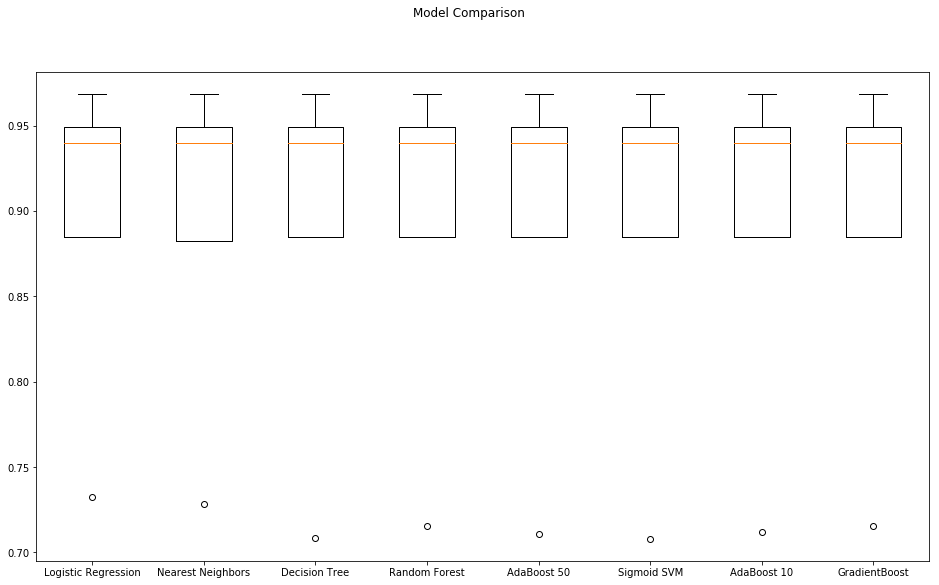

In [82]:
# Compare the algorithms' cross-validation using boxplots
fig = plt.figure(figsize = (16, 9))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(k_score_items)
ax.set_xticklabels(names)
plt.show()

In [83]:
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 5 training sizes
train_sizes = [10000, 15000, 20000, 25000, 27522]

# Split dataset into 5 folds
train_sizes, train_scores, validation_scores = learning_curve(
                                                    estimator = LogisticRegression(), 
                                                    X = dfBankData[feature_cols],
                                                    y = dfBankData['y'], 
                                                    train_sizes = train_sizes, 
                                                    cv = 5,
                                                    scoring = 'accuracy', shuffle = True)

In [84]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.9027     0.9097     0.9057     0.8966     0.9349    ]
 [0.90246667 0.90766667 0.90566667 0.89813333 0.93173333]
 [0.90105    0.90645    0.9034     0.89915    0.9309    ]
 [0.90332    0.90604    0.90384    0.8998     0.93056   ]
 [0.90276869 0.90447642 0.90389507 0.89968026 0.93183635]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.89000291 0.89000291 0.89040698 0.88706395 0.1130814 ]
 [0.89000291 0.89000291 0.89011628 0.88706395 0.11482558]
 [0.89000291 0.89000291 0.89011628 0.88590116 0.11773256]
 [0.89000291 0.89000291 0.89011628 0.8880814  0.11497093]
 [0.89000291 0.89000291 0.89011628 0.8872093  0.12223837]]


In [ ]:
# The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those
# attributes that remain

In [85]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 100, C = 1e9)
logreg.fit(X_train, y_train)  # coefficients are computed at the time of fit()
    
# Print feature importance according to the model
# model.coef_ is a numpy.ndarray with dimensions (1, n), not a 1-dimensional array like features is
df = pd.DataFrame({"Feature": feature_cols, "coef": logreg.coef_[0]})
df['coefmagnitude'] = df.coef.map(lambda x: abs(x))
df.sort_values('coefmagnitude', ascending = False)

,Feature,coef,coefmagnitude
13,euribor3m,-0.187398,0.187398
10,emp.var.rate,-0.176362,0.176362
5,month,-0.162154,0.162154
11,cons.price.idx,0.130106,0.130106
6,campaign,-0.071058,0.071058
1,job,-0.017866,0.017866
2,education,0.015493,0.015493
16,marital_single,0.013387,0.013387
15,marital_married,-0.011631,0.011631
12,cons.conf.idx,0.010425,0.010425


In [86]:
import eli5
from eli5.sklearn import PermutationImportance

# Print feature importance according to eli
perm = PermutationImportance(logreg, random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0150 ± 0.0009,pdays
0.0045 ± 0.0013,euribor3m
0.0036 ± 0.0003,emp.var.rate
0.0032 ± 0.0007,nr.employed
0.0019 ± 0.0011,cons.price.idx
0.0012 ± 0.0009,month
0.0010 ± 0.0008,campaign
0.0004 ± 0.0002,education
0.0002 ± 0.0000,previous
0.0002 ± 0.0003,job
